# This is a tutorial to run a simulation of a simple Boolean Network model


In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# import booleanNetwork module from ./src
import sys
sys.path.append('C:/Users/15167/OneDrive/Documents/ISB/AML-DT-BNM/jupyter_notebook/Python/BooleanNetwork/')
import booleanNetwork as bn
import BMatrix  #this is the code I made

### Create a Simple Boolean network models

In [2]:
# Simple Boolean network model
# v0 = v0 | v1
# v1 = v0 | v1
# v2 = ( v0 | v1 ) & !v2

ngenes = 3

# conectivity matrix
varF = np.array( [[0, 1, -1],  # indices of genes connected to gene 0
                  [0, 1, -1],  # indices of genes connected to gene 1
                  [0, 1, 2]] ) # indices of genes connected to gene 2

# truth tables
F = np.array( [[0, 1, 1, 1, -1, -1, -1, -1], # truth table for gene 0 
               [0, 1, 1, 1, -1, -1, -1, -1], # truth table for gene 1
               [0, 0, 1, 0, 1, 0, 1, 0]] ) # truth table for gene 2



# initial state
x0  =  np.array( [1, 0, 1] )  # initial state [v0, v1, v2] 

print(varF)
print('space')
print(F)

[[ 0  1 -1]
 [ 0  1 -1]
 [ 0  1  2]]
space
[[ 0  1  1  1 -1 -1 -1 -1]
 [ 0  1  1  1 -1 -1 -1 -1]
 [ 0  0  1  0  1  0  1  0]]


In [3]:
#trying to get the same varF and F

#how the file looks
#v0 = v0 | v1
#v1 = v0 | v1
#v2 = ( v0 | v1 ) & ! v2 #added a space b/w ! and v2

file = 'C:/Users/15167/OneDrive/Documents/ISB/test_equations.txt' #does not have the equations at the end

equations = BMatrix.getting_equations(file)
gene_dict = BMatrix.gene_dictionary(equations)
only_genes = BMatrix.only_function_genes(equations)

varF = BMatrix.connectivity_matrix(equations,only_genes,gene_dict)
varF = np.array(varF)
#print(varF)

F = BMatrix.truth_table(equations,only_genes)
F = np.array(F)
#print(F)

ngenes= len(equations)

# initial state
x0 = np.random.randint(2, size=ngenes) #random inital state 
x0 = np.array(x0)
#print(x0)

print(varF)
print('space')
print(F)

[[ 0  1 -1]
 [ 0  1 -1]
 [ 0  1  2]]
space
[[ 0  1  1  1 -1 -1 -1 -1]
 [ 0  1  1  1 -1 -1 -1 -1]
 [ 0  0  1  0  1  0  1  0]]


### Run a small simulation of 3 steps without noise

In [4]:
network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object

In [5]:
y = network.update( 3 )  # run 3 steps of the Boolean network model
y 

array([[0, 1, 0],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 1]], dtype=int8)

###  Run a simulation of 100000 steps with noise and plot state distribution from the trajectory

In [6]:
x0 = np.array( [0, 0, 0] ) # initial state
network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object

In [7]:
##%%timeit
noise_level = 0.01 # noise
y = network.update_noise ( noise_level  , 100000) # simulation with noise

In [8]:
# transform boolean to decimal
p = np.array(  [2**i for i in range(ngenes-1, -1, -1) ] )  
states = y @ p.T 

In [9]:
#print(states)

<BarContainer object of 8 artists>

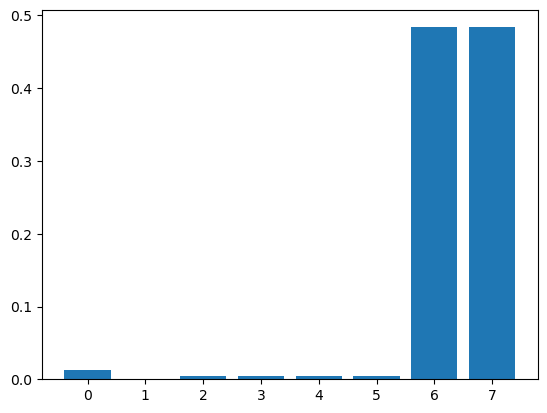

In [10]:
# plot state distribution
counts, bins = np.histogram( states, bins = range(2**ngenes + 1 )  )
freq = counts / np.sum( counts)
plt.bar(range(2**ngenes), freq )

# Trying to knock in/out genes

In [11]:
#getting the varF and F 

#how the file looks
#v0 = v0 | v1
#v1 = v0 | v1
#v2 = ( v0 | v1 ) & ! v2 #added a space b/w ! and v2

file = 'C:/Users/15167/OneDrive/Documents/ISB/test_equations.txt' #does not have the equations at the end

equations = BMatrix.getting_equations(file)
gene_dict = BMatrix.gene_dictionary(equations)
only_genes = BMatrix.only_function_genes(equations)

varF = BMatrix.connectivity_matrix(equations,only_genes,gene_dict)
varF = np.array(varF)
#print(varF)

F = BMatrix.truth_table(equations,only_genes)
F = np.array(F)
#print(F)

ngenes= len(equations)

print(varF)
print('space')
print(F)

[[ 0  1 -1]
 [ 0  1 -1]
 [ 0  1  2]]
space
[[ 0  1  1  1 -1 -1 -1 -1]
 [ 0  1  1  1 -1 -1 -1 -1]
 [ 0  0  1  0  1  0  1  0]]


In [12]:
#knocking in/out genes
#varF for genes that are knocked out are supposed to all turn into -1 
#assume mutation_profile is given (from data usually)
mutation_profile = 'v0,v1,v2'

#fixing the mutation_profile (removing repeats)
mutation_profile = mutation_profile.split(',')
mutation_profile = list(set(mutation_profile))
#print(mutation_profile)

#make the varF rows in mutation_profile all -1 
for gene in mutation_profile:
    varF[[gene_dict[gene]], :] = -1 
print(varF)

#the inital state is set 
x0  =  np.array( [1, 0, 1] )
print(x0)

[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]]
[1 0 1]


## Running the new knocked in/out model

In [13]:
network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object

In [14]:
y = network.update( 50 )  # run 3 steps of the Boolean network model

y 

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1]], dtype=int8)

In [15]:
##%%timeit
noise_level = 0.01 # noise
y = network.update_noise ( noise_level  , 200) # simulation with noise

y

array([[1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [1,